In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import seaborn as sns

print('import modules successfully')

import modules successfully


# Task 1 - Data preparation
### 1. Show the distribution of data in two classes


In [2]:
# Task 1: Data preparation
df_test = pd.read_csv("data_set_ALL_AML_independent.csv")
df_train = pd.read_csv("data_set_ALL_AML_train.csv")
df_actual = pd.read_csv("actual.csv")

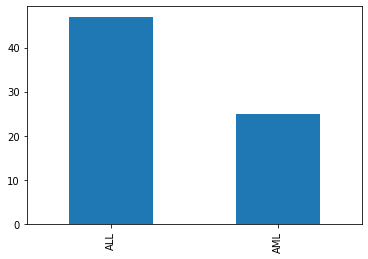

In [3]:
df_actual['cancer'].value_counts().plot(kind='bar');

### 2. Encode the labels

In [4]:
# import sklearn module
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_actual["cancer"] = encoder.fit_transform(df_actual["cancer"])
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   patient  72 non-null     int64
 1   cancer   72 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


### 3. Remove all the 'call' column from train and test set

In [5]:
# removing all the call columns from train dataframe
arr_train_header = list(df_train.columns)
for i in range(len(arr_train_header)):
    if 'call' in arr_train_header[i]:
        df_train = df_train.drop(arr_train_header[i], axis=1)
# removing two first columns ["Gene Description", "Gene Accession Number"]
df_train = df_train.iloc[:, 2:]

In [6]:
df_train = df_train.reindex(natsorted(df_train.columns), axis=1)
df_train.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38'],
      dtype='object')

In [7]:
df_train = df_train.T
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [8]:
# removing all the call columns from test dataframe
arr_test_header = list(df_test.columns)
for i in range(len(arr_test_header)):
    if 'call' in arr_test_header[i]:
        df_test = df_test.drop(arr_test_header[i], axis=1)
# removing two first columns ["Gene Description", "Gene Accession Number"]
df_test = df_test.iloc[:, 2:]

In [9]:
df_test = df_test.reindex(natsorted(df_test.columns), axis=1)
df_test.columns

Index(['39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72'],
      dtype='object')

In [10]:
df_test = df_test.T
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [11]:
df_train.shape

(38, 7129)

In [12]:
df_test.shape

(34, 7129)

### 4. Associate the train and test data to the labels

In [13]:
# associate the train set to the labels
cancer_col_train = df_actual.iloc[:38, 1]
df_train = df_train.reset_index(drop = True)
cancer_col_train = cancer_col_train.reset_index(drop = True)

frames = [df_train, cancer_col_train]
df_train = pd.concat(frames, axis = 1)
df_train.shape

(38, 7130)

In [14]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,0


In [15]:
# associate the test set to the labels
cancer_col_test = df_actual.iloc[38:, 1]
df_test = df_test.reset_index(drop = True)
cancer_col_test = cancer_col_test.reset_index(drop = True)

frames = [df_test, cancer_col_test]
df_test = pd.concat(frames, axis = 1)
df_test.shape

(34, 7130)

In [16]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,0
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,0
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,0
3,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,0
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,0


### 5. Compute and summary statistics for data

In [17]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526,0.289474
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132,0.459606
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000,0.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000,0.000000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000,0.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000,1.000000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000,1.000000


In [18]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,-107.558824,-170.852941,2.088235,198.235294,-227.323529,-347.970588,-88.470588,-178.970588,58.882353,82.617647,...,576.205882,-34.735294,362.441176,-48.882353,681.647059,268.294118,-1.205882,354.235294,-32.088235,0.411765
std,83.662088,115.018347,129.075117,106.335392,130.331215,153.288891,345.372108,109.298447,92.545080,245.681121,...,291.440599,93.479315,245.543947,58.024950,397.651887,199.751289,54.930689,479.403990,49.030212,0.499554
min,-342.000000,-531.000000,-410.000000,9.000000,-535.000000,-810.000000,-1038.000000,-452.000000,-148.000000,-468.000000,...,91.000000,-295.000000,-24.000000,-220.000000,67.000000,-42.000000,-207.000000,-68.000000,-190.000000,0.000000
25%,-156.250000,-216.500000,-49.000000,142.000000,-276.500000,-398.500000,-222.000000,-224.750000,-6.000000,-95.500000,...,387.000000,-78.250000,239.250000,-78.000000,427.500000,165.500000,-19.250000,102.250000,-63.500000,0.000000
50%,-92.500000,-148.500000,10.000000,177.500000,-208.500000,-309.500000,-95.500000,-141.000000,46.000000,102.000000,...,557.000000,-9.500000,298.500000,-52.500000,621.500000,241.500000,0.000000,203.000000,-31.500000,0.000000
75%,-56.500000,-102.000000,47.500000,274.500000,-170.250000,-246.250000,119.500000,-106.500000,130.000000,197.000000,...,695.250000,31.000000,459.000000,2.000000,880.000000,366.000000,26.750000,328.500000,-1.250000,1.000000
max,86.000000,-13.000000,312.000000,431.000000,114.000000,-122.000000,709.000000,-11.000000,236.000000,878.000000,...,1455.000000,132.000000,1075.000000,47.000000,1950.000000,906.000000,84.000000,1971.000000,78.000000,1.000000


In [19]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = scaler.fit_transform(df_train)
df_train_normalized = pd.DataFrame(df_train_scaled, columns = df_train.columns)

scaler.fit(df_test)
df_test_scaled = scaler.fit_transform(df_test)
df_test_normalized = pd.DataFrame(df_test_scaled, columns = df_test.columns)

In [20]:
df_train_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.720348,0.574833,0.506717,0.507932,0.539689,0.552424,0.484879,0.596391,0.496035,0.421561,...,0.368679,0.471757,0.145777,0.560655,0.317949,0.276069,0.419458,0.158496,0.498381,0.289474
std,0.222222,0.246692,0.205745,0.274458,0.226540,0.213320,0.244412,0.206923,0.227886,0.272958,...,0.208543,0.194718,0.188511,0.258208,0.227531,0.196467,0.188841,0.228089,0.237316,0.459606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.684077,0.397394,0.391171,0.273949,0.340306,0.382677,0.345212,0.509681,0.323288,0.216495,...,0.245976,0.341540,0.055600,0.390244,0.188797,0.179541,0.351515,0.043192,0.394231,0.000000
50%,0.749493,0.604235,0.460664,0.551402,0.567347,0.572441,0.496102,0.632118,0.497260,0.367912,...,0.333100,0.476010,0.092332,0.573171,0.259198,0.250468,0.424242,0.076839,0.523077,0.000000
75%,0.827079,0.756515,0.619318,0.736565,0.718878,0.701181,0.621381,0.724943,0.641781,0.589884,...,0.521693,0.593434,0.166901,0.739329,0.432547,0.326311,0.486364,0.153130,0.634615,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_test_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.547760,0.695265,0.570759,0.448425,0.474078,0.671554,0.543520,0.619114,0.538756,0.409077,...,0.355723,0.609519,0.351630,0.640890,0.326419,0.327314,0.707196,0.207080,0.589223,0.411765
std,0.195472,0.222043,0.178774,0.251980,0.200819,0.222804,0.197694,0.247842,0.241003,0.182527,...,0.213666,0.218921,0.223425,0.217322,0.211180,0.210708,0.188765,0.235117,0.182949,0.499554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.433995,0.607143,0.500000,0.315166,0.398305,0.598110,0.467086,0.515306,0.369792,0.276746,...,0.217009,0.507611,0.239536,0.531835,0.191450,0.218882,0.645189,0.083497,0.472015,0.000000
50%,0.582944,0.738417,0.581717,0.399289,0.503082,0.727471,0.539496,0.705215,0.505208,0.423477,...,0.341642,0.668618,0.293449,0.627341,0.294477,0.299051,0.711340,0.132908,0.591418,0.000000
75%,0.667056,0.828185,0.633657,0.629147,0.562018,0.819404,0.662564,0.783447,0.723958,0.494056,...,0.442999,0.763466,0.439490,0.831461,0.431758,0.430380,0.803265,0.194458,0.704291,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Task 2 - Dimensionality Reduction 

### 1. Research a high-level description of PCA method and how it is used for reducing the length of the input feature vector
PCA trades a little accuracy for simplicity, while reducing the number of variables of the dataset to make analyzing data much easier and faster. In high level term, this means reducing the dimension of the feature space. This also means dimensionality reduction. There are five main steps of the PCA process. Firstly, we will perform standardization ensure each feature contributes equally to the analysis. Secondly, we perform covariance matrix computation, this means analyzing the relationship between variables and their correlation to reduce redundant information. Thirdly, we compute eigenvectors and eigenvalues of the covariance matrix to identify the principal components. Fourthly, we assemble the feature vector, which contains columns the eigenvectors of the components we decided to keep. Finally, we recast the data along the principle components axes. 

### 2. Use PCA from sklearn to select features that account for 90% of data variance in trainset

In [22]:
df_train_no_target = df_train_normalized.iloc[:, :-1]
df_train_no_target.shape

(38, 7129)

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)

pca_features = pca.fit_transform(df_train_no_target)
print("shape before PCA: ", df_train_no_target.shape)
print("shape after PCA: ", pca_features.shape)

df_train_pca = pd.DataFrame(data = pca_features, columns = ['PC1', 'PC2', 'PC3'])

shape before PCA:  (38, 7129)
shape after PCA:  (38, 3)


In [24]:
frames = [df_train_pca, cancer_col_train]
df_train_pca = pd.concat(frames, axis = 1)
df_train_pca.shape

(38, 4)

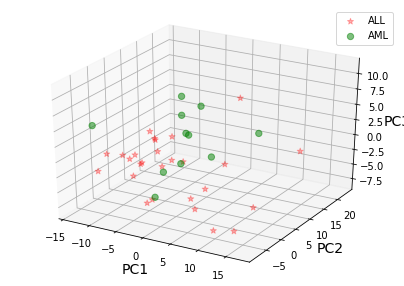

In [25]:
import numpy as np 

xdata = pca_features[:, 0]
ydata = pca_features[:, 1]
zdata = pca_features[:, 2]

cdict = {0: 'red', 1: 'green'}
labl = {0: 'ALL', 1: 'AML'}
marker = {0: '*', 1: 'o'}
alpha = {0: .3, 1: .5}

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection= '3d')

fig.patch.set_facecolor('white')
for i in np.unique(cancer_col_train):
    ix = np.where(cancer_col_train == i)
    ax.scatter(xdata[ix], ydata[ix], zdata[ix], c=cdict[i], s=40,
                label = labl[i], marker=marker[i], alpha=alpha[i])

ax.set_xlabel("PC1", fontsize = 14)
ax.set_ylabel("PC2", fontsize = 14)
ax.set_zlabel("PC3", fontsize = 14)

ax.legend()
plt.show()


# Task 3 - Data Analysis
Using the original data set without dimensionality reduction
Allowed to implement GridSearchCV from sklearn to determine the best hyperparameters
Performance reported on the test set by accuracy, sensitivity, specificity, and confusion matrix.
### 1. Establish a baseline 

In [43]:
data_train, target_train = df_train_normalized.iloc[:, 0: -1], df_train_normalized.iloc[:, -1]
data_test, target_test = df_test_normalized.iloc[:, 0: -1], df_test_normalized.iloc[:, -1]
print(data_train.shape, target_train.shape)
print(data_test.shape, target_test.shape)

(38, 7129) (38,)
(34, 7129) (34,)


In [44]:
# Establish baseline
df_combined_normalized = pd.concat([df_train_normalized, df_test_normalized], axis = 0)
print(df_combined_normalized['cancer'].value_counts())

0.0    47
1.0    25
Name: cancer, dtype: int64


### 2/3. Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state = 0).fit(data_train, target_train)
print('accuracy', end = ' ')
target_predict = clf.predict(data_test)
print(clf.score(data_test, target_test))
tn, fp, fn, tp = confusion_matrix(target_predict, target_test).ravel()
print('specificity: {}'.format(tn / (tn + fp))) 
print('sensitivity: {}'.format(tp / (tp + fn))) 
print('confusion matrix : ')
print('[{} {}]'.format(tn, fp))
print('[{}  {}]'.format(fn, tp))


accuracy 0.7352941176470589
specificity: 0.6896551724137931
sensitivity: 1.0
confusion matrix : 
[20 9]
[0  5]


### 4. Decision Tree

In [58]:
from sklearn import tree

tree = tree.DecisionTreeClassifier().fit(data_train, target_train)
print('accuracy ', end = "")
print(tree.score(data_test, target_test))

accuracy 0.9117647058823529


### 5. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= 3, random_state=0).fit(data_train, target_train)
print('accuracy ', end = "")
print(rf.score(data_test, target_test))

accuracy 0.7941176470588235


### 6. ANN using tensorflow-keras